# Logistic Regression: 3-class Classifier

The Conditional MNL is a generalization of the multi-class Logistic Regression.
Here, we recreate the scikit-learn tutorial that can be found [here](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py).

In [ ]:
import os

# Remove GPU use
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import sys

sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

from choice_learn.models import ConditionalMNL
from choice_learn.data import ChoiceDataset

In [ ]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

We need to create a ChoiceDataset object. Features are contexts_features as they are shared by the three outcomes. The class labels are ''choices''.

In [ ]:
dataset = ChoiceDataset(contexts_features=(X, ),
contexts_features_names=(["feat_1", "feat_2"], ),
                        fixed_items_features=np.ones((3, 3)),
                        choices=Y)

For the model parametrization, we specify that we want to learn one weight by outcome for each feature: 'feat_1', 'feat_2' and the intercept. This is done with the keyword "item-full".

In [ ]:
parametrization = {
    "intercept": "item-full",
    "feat_1": "item-full",
    "feat_2": "item-full"
}

# Let's estimate the weights
model = ConditionalMNL(parameters=parametrization, optimizer="lbfgs")
hist = model.fit(dataset, epochs=100)

Let's display the resulting model, just as in the sk-learn tutorial.

In [ ]:
feature_1, feature_2 = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

grid_dataset = ChoiceDataset(contexts_features=(grid, ),
contexts_features_names=(["feat_1", "feat_2"], ),
                        fixed_items_features=np.ones((3, 3)),
                        choices=np.ones(len(grid), ))

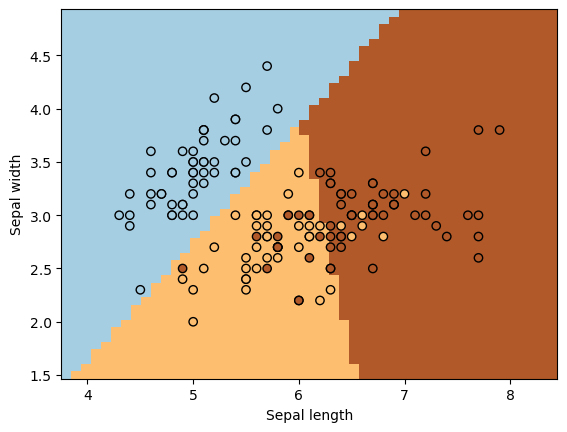

In [ ]:
y_pred = np.reshape(np.argmax(model.predict_probas(grid_dataset), axis=1), feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot(plot_method="pcolormesh",
    cmap=plt.cm.Paired,
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width")
display.ax_.scatter(
    X[:, 0], X[:, 1], c=Y, edgecolor="black", 
    cmap=plt.cm.Paired,
)
plt.show()

It sure looks alike !